### **Tratamento da base de dados**

In [1]:
# Importando bibliotecas
import pandas as pd
import ast
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np

In [2]:
file_path = './dataset/LetterboxdTop250-5000reviews.csv'
reviews_250_df = pd.read_csv(file_path)

In [3]:
reviews_250_df.head(5)

,Unnamed: 0,NAME,YEAR,DIRECTOR,SYNOPSYS,RATINGS,REVIEWS
0,0,Harakiri,1962,Masaki Kobayashi,Down-on-his-luck veteran Tsugumo Hanshirō ente...,"[' ★★★★★ ', ' ★★★★½ ', ' ★★★★★ ', ' ★★★★★ ', '...",[' honor in the individual is virtue honor in ...
1,1,Come and See,1985,Elem Klimov,The invasion of a village in Byelorussia by Ge...,"[' ★★★★★ ', ' ★★★★★ ', ' ★★★★½ ', ' ★★★★★ ', '...",[' as soon as this film ended i went online an...
2,2,12 Angry Men,1957,Sidney Lumet,The defense and the prosecution have rested an...,"[' ★★★★★ ', ' ★★★★★ ', ' ★★★★ ', ' ★★★★½ ', ' ...","["" That was the best 1.5 hours of middle aged ..."
3,3,Seven Samurai,1954,Akira Kurosawa,A samurai answers a village's request for prot...,"[' ★★★★★ ', ' ★★★★★ ', ' ★★★★½ ', ' ★★★★★ ', '...","[' too many sweaty ass cheeks, 5 stars ***', '..."
4,4,The Godfather: Part II,1974,Francis Ford Coppola,In the continuing saga of the Corleone crime f...,"[' ★★★★★ ', ' ★★★★★ ', ' ★★★★★ ', ' None ', ' ...","["" young, totally fuckable al pacino and rober..."


In [4]:
reviews_250_df.drop(['SYNOPSYS'], axis=1, inplace=True)

In [5]:
reviews_250_df.head(5)

,Unnamed: 0,NAME,YEAR,DIRECTOR,RATINGS,REVIEWS
0,0,Harakiri,1962,Masaki Kobayashi,"[' ★★★★★ ', ' ★★★★½ ', ' ★★★★★ ', ' ★★★★★ ', '...",[' honor in the individual is virtue honor in ...
1,1,Come and See,1985,Elem Klimov,"[' ★★★★★ ', ' ★★★★★ ', ' ★★★★½ ', ' ★★★★★ ', '...",[' as soon as this film ended i went online an...
2,2,12 Angry Men,1957,Sidney Lumet,"[' ★★★★★ ', ' ★★★★★ ', ' ★★★★ ', ' ★★★★½ ', ' ...","["" That was the best 1.5 hours of middle aged ..."
3,3,Seven Samurai,1954,Akira Kurosawa,"[' ★★★★★ ', ' ★★★★★ ', ' ★★★★½ ', ' ★★★★★ ', '...","[' too many sweaty ass cheeks, 5 stars ***', '..."
4,4,The Godfather: Part II,1974,Francis Ford Coppola,"[' ★★★★★ ', ' ★★★★★ ', ' ★★★★★ ', ' None ', ' ...","["" young, totally fuckable al pacino and rober..."


In [6]:
reviews_250_df.drop(reviews_250_df.columns[reviews_250_df.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)

In [7]:
reviews_250_df.head(5)

,NAME,YEAR,DIRECTOR,RATINGS,REVIEWS
0,Harakiri,1962,Masaki Kobayashi,"[' ★★★★★ ', ' ★★★★½ ', ' ★★★★★ ', ' ★★★★★ ', '...",[' honor in the individual is virtue honor in ...
1,Come and See,1985,Elem Klimov,"[' ★★★★★ ', ' ★★★★★ ', ' ★★★★½ ', ' ★★★★★ ', '...",[' as soon as this film ended i went online an...
2,12 Angry Men,1957,Sidney Lumet,"[' ★★★★★ ', ' ★★★★★ ', ' ★★★★ ', ' ★★★★½ ', ' ...","["" That was the best 1.5 hours of middle aged ..."
3,Seven Samurai,1954,Akira Kurosawa,"[' ★★★★★ ', ' ★★★★★ ', ' ★★★★½ ', ' ★★★★★ ', '...","[' too many sweaty ass cheeks, 5 stars ***', '..."
4,The Godfather: Part II,1974,Francis Ford Coppola,"[' ★★★★★ ', ' ★★★★★ ', ' ★★★★★ ', ' None ', ' ...","["" young, totally fuckable al pacino and rober..."


In [8]:
reviews_250_df.shape

(250, 5)

In [9]:
# Converte as strings em listas
reviews_250_df['REVIEWS'] = reviews_250_df['REVIEWS'].apply(ast.literal_eval)
reviews_250_df['RATINGS'] = reviews_250_df['RATINGS'].apply(ast.literal_eval)

# Explode as listas
reviews_250_df_reviews_exploded = reviews_250_df.explode('REVIEWS')
reviews_250_df_quantidade_estrelas_exploded = reviews_250_df.explode('RATINGS')

# Resetando índices para garantir a correspondência entre as linhas
reviews_250_df_reviews_exploded = reviews_250_df_reviews_exploded.reset_index(drop=True)
reviews_250_df_quantidade_estrelas_exploded = reviews_250_df_quantidade_estrelas_exploded.reset_index(drop=True)

# Removendo colunas duplicadas
reviews_250_df_reviews_exploded.drop(['NAME', 'YEAR', 'DIRECTOR', 'RATINGS'], axis=1,inplace=True)
reviews_250_df_quantidade_estrelas_exploded.drop('REVIEWS',axis=1, inplace=True) 
# Concatenar os dois dataframes
reviews_250_df_final = pd.concat([reviews_250_df_quantidade_estrelas_exploded,reviews_250_df_reviews_exploded], axis=1)

In [10]:
reviews_250_df_final.shape

(5000, 5)

In [11]:
reviews_250_df_final.dropna(subset=['REVIEWS'], inplace=True)
reviews_250_df_final.dropna(subset=['RATINGS'], inplace=True)

In [12]:
reviews_250_df_final.shape

(5000, 5)

In [13]:
reviews_df = reviews_250_df_final.copy()

In [14]:
reviews_df.head()

,NAME,YEAR,DIRECTOR,RATINGS,REVIEWS
0,Harakiri,1962,Masaki Kobayashi,★★★★★,honor in the individual is virtue honor in a ...
1,Harakiri,1962,Masaki Kobayashi,★★★★½,"Firstly, I must apologise for holding off on ..."
2,Harakiri,1962,Masaki Kobayashi,★★★★★,God damn what an impeccable film. Not dated i...
3,Harakiri,1962,Masaki Kobayashi,★★★★★,Probably the greatest film ever.. a film abou...
4,Harakiri,1962,Masaki Kobayashi,★★★★★,Immediately pulls you in with its captivating...


In [15]:
# Criando uma coluna SCORES transformando a quantidade de estrelas em números
# reviews_df['SCORES'] = reviews_df['RATINGS'].apply(lambda rating: rating.count('★') + (rating.count('★½')))
reviews_df['RATING_SCORES'] = reviews_df['RATINGS'].apply(lambda rating: rating.count('★') + (0.5 * rating.count('½')))
reviews_df.insert(4, 'RATING_SCORES', reviews_df.pop('RATING_SCORES'))

In [16]:
reviews_df

,NAME,YEAR,DIRECTOR,RATINGS,RATING_SCORES,REVIEWS
0,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,honor in the individual is virtue honor in a ...
1,Harakiri,1962,Masaki Kobayashi,★★★★½,4.5,"Firstly, I must apologise for holding off on ..."
2,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,God damn what an impeccable film. Not dated i...
3,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,Probably the greatest film ever.. a film abou...
4,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,Immediately pulls you in with its captivating...
...,...,...,...,...,...,...
4995,A Moment of Innocence,1996,Mohsen Makhmalbaf,★★★★★,5.0,"""Have you seen a ray of sunlight here?""Hilari..."
4996,A Moment of Innocence,1996,Mohsen Makhmalbaf,★★★★★,5.0,O HM Y F E C K I'm not even gonna attempt to ...
4997,A Moment of Innocence,1996,Mohsen Makhmalbaf,★★★★½,4.5,I think those eyebrows have the power to save...
4998,A Moment of Innocence,1996,Mohsen Makhmalbaf,★★★★½,4.5,This movie was one of the first i watched fro...


<!-- ### **Análise de Sentimentos**
VADER (_Valence Aware Dictionary for Sentiment Reasoning_, Dicionário com Reconhecimento de Valência para Raciocínio de Sentimento) é um modelo usado para análise de sentimento de texto que é sensível à polaridade (positiva/negativa) e à intensidade (força) da emoção. Está disponível no pacote NLTK (_Natural Language Toolkit_) e pode ser aplicado diretamente a dados de texto não rotulados.  
https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664 -->

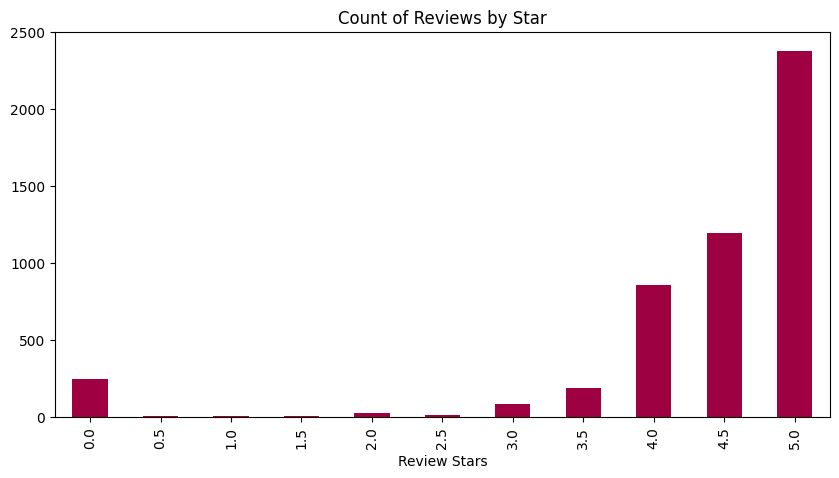

In [17]:
axis = reviews_df['RATING_SCORES'].value_counts().sort_index() \
                            .plot(kind='bar',
                                  title='Count of Reviews by Star',
                                  figsize=(10,5),
                                  colormap=cm.get_cmap('Spectral'))

axis.set_xlabel('Review Stars')
plt.ylim(reviews_df.index.start, reviews_df['RATING_SCORES'].index.stop - 2500) 
plt.show()
# reviews_df.index
# reviews_df.index.start
# reviews_df.index.stop

> Podemos observar que a predominância de avaliações é a classificação máxima de cinco estrelas.

### **Operações Básicas com NLTK**

In [18]:
import nltk

In [19]:
review_example = reviews_df['REVIEWS'][21]
print(review_example)

 What a horrible nightmare! ***


In [20]:
# Baixando módulo necessário
nltk.download('punkt')

# Tokenizando a sentença
example_tokens = nltk.word_tokenize(review_example,language='english',preserve_line=False)
example_tokens[:5]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\018117631\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['What', 'a', 'horrible', 'nightmare', '!']

#### Parts of Speech Tagging 
A marcação das classes gramaticais é útil para análise sintática, geração de regras gramaticais, análise semântica e  outras tarefas que dependem da compreensão da estrutura da frase.  
https://www.guru99.com/pos-tagging-chunking-nltk.html

In [21]:
# Baixando módulo necessário
nltk.download('averaged_perceptron_tagger')


tagged = nltk.pos_tag(example_tokens)

# Baixando módulo necessário
tagged[:5]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\018117631\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('What', 'WP'),
 ('a', 'DT'),
 ('horrible', 'JJ'),
 ('nightmare', 'NN'),
 ('!', '.')]

In [22]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

# A identificação de entidades nomeadas é útil para extração de informações, indexação de documentos, sumarização automática 
# de textos e outras tarefas que requerem compreensão do conteúdo do texto além da estrutura gramatical.
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\018117631\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\018117631\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


(S What/WP a/DT horrible/JJ nightmare/NN !/. */JJ */NN */NN)


### **Análise de Sentimento com VADER**
VADER (_Valence Aware Dictionary for Sentiment Reasoning_, Dicionário com Reconhecimento de Valência para Raciocínio de Sentimento) é um modelo usado para análise de sentimento de texto que é sensível à polaridade (positiva/negativa) e à intensidade (força) da emoção. Está disponível no pacote NLTK (_Natural Language Toolkit_) e pode ser aplicado diretamente a dados de texto não rotulados.  
https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [24]:
print(review_example)

 What a horrible nightmare! ***


In [25]:
sia.polarity_scores(review_example)

{'neg': 0.558, 'neu': 0.442, 'pos': 0.0, 'compound': -0.5848}

> O resultado deste teste demonstra que o algoritmo classificou a frase como positiva

In [26]:
""" # if compound > 0.5 = positive
# if compound < -0.5 =negative
# between 0.5 and -0.5 = neutral
def polarity_classificator(compound):
    if compound >= 0.5:
        return 'pos'
    elif -0.5 < compound < 0.5:
        return 'neu'
    return 'neg'

train_df['COMPOUND_CLASSIFICATION'] = train_df['COMPOUND'].apply(lambda c: polarity_classificator(c))
train_df """

" # if compound > 0.5 = positive\n# if compound < -0.5 =negative\n# between 0.5 and -0.5 = neutral\ndef polarity_classificator(compound):\n    if compound >= 0.5:\n        return 'pos'\n    elif -0.5 < compound < 0.5:\n        return 'neu'\n    return 'neg'\n\ntrain_df['COMPOUND_CLASSIFICATION'] = train_df['COMPOUND'].apply(lambda c: polarity_classificator(c))\ntrain_df "

In [27]:
# reviews_df['POLARITY_SCORES'] = reviews_df['REVIEWS'].apply(lambda review: sia.polarity_scores(review))
polarity_scores = reviews_df['REVIEWS'].apply(lambda review: sia.polarity_scores(review))
# type(polarity_scores)
result = polarity_scores.to_dict()
result

{0: {'neg': 0.144, 'neu': 0.398, 'pos': 0.458, 'compound': 0.743},
 1: {'neg': 0.0, 'neu': 0.717, 'pos': 0.283, 'compound': 0.9781},
 2: {'neg': 0.048, 'neu': 0.855, 'pos': 0.097, 'compound': 0.7498},
 3: {'neg': 0.131, 'neu': 0.591, 'pos': 0.278, 'compound': 0.7906},
 4: {'neg': 0.083, 'neu': 0.807, 'pos': 0.109, 'compound': 0.7055},
 5: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 6: {'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'compound': 0.4588},
 7: {'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'compound': 0.799},
 8: {'neg': 0.089, 'neu': 0.796, 'pos': 0.114, 'compound': 0.4595},
 9: {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.4939},
 10: {'neg': 0.201, 'neu': 0.799, 'pos': 0.0, 'compound': -0.7418},
 11: {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.886},
 12: {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404},
 13: {'neg': 0.152, 'neu': 0.766, 'pos': 0.082, 'compound': -0.8553},
 14: {'neg': 0.157, 'neu': 0.631, 'pos': 0.212, 'compound': 0.7829},

In [28]:
vaders = pd.DataFrame(result)
vaders

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
neg,0.144,0.0000,0.0480,0.1310,0.0830,0.0,0.0000,0.000,0.0890,0.0000,...,0.063,0.0000,0.1470,0.0880,0.000,0.125,0.0,0.0000,0.0250,0.0
neu,0.398,0.7170,0.8550,0.5910,0.8070,1.0,0.8420,0.786,0.7960,0.9090,...,0.801,0.8110,0.7060,0.8270,0.614,0.750,1.0,0.7580,0.8100,1.0
pos,0.458,0.2830,0.0970,0.2780,0.1090,0.0,0.1580,0.214,0.1140,0.0910,...,0.136,0.1890,0.1470,0.0850,0.386,0.125,0.0,0.2420,0.1640,0.0
compound,0.743,0.9781,0.7498,0.7906,0.7055,0.0,0.4588,0.799,0.4595,0.4939,...,0.340,0.5994,0.0174,0.1779,0.890,0.000,0.0,0.4939,0.9001,0.0


In [29]:
# Obtém a transposição do dataframe
vaders = vaders.T
vaders[:5]

,neg,neu,pos,compound
0,0.144,0.398,0.458,0.7430
1,0.000,0.717,0.283,0.9781
2,0.048,0.855,0.097,0.7498
3,0.131,0.591,0.278,0.7906
4,0.083,0.807,0.109,0.7055


In [30]:
reviews_df = reviews_df.reset_index()
reviews_df
vaders = vaders.reset_index()
vaders
vaders = reviews_df.merge(vaders, on='index', how='right')


In [31]:
vaders.to_csv('./vader.csv')
vaders.head(5)

,index,NAME,YEAR,DIRECTOR,RATINGS,RATING_SCORES,REVIEWS,neg,neu,pos,compound
0,0,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,honor in the individual is virtue honor in a ...,0.144,0.398,0.458,0.7430
1,1,Harakiri,1962,Masaki Kobayashi,★★★★½,4.5,"Firstly, I must apologise for holding off on ...",0.000,0.717,0.283,0.9781
2,2,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,God damn what an impeccable film. Not dated i...,0.048,0.855,0.097,0.7498
3,3,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,Probably the greatest film ever.. a film abou...,0.131,0.591,0.278,0.7906
4,4,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,Immediately pulls you in with its captivating...,0.083,0.807,0.109,0.7055


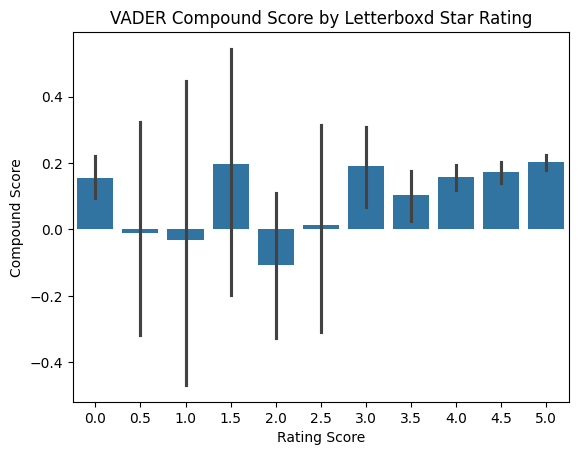

In [32]:
ax = sns.barplot(data=vaders, x='RATING_SCORES', y='compound')
ax.set_title('VADER Compound Score by Letterboxd Star Rating')
plt.xlabel('Rating Score')
plt.ylabel('Compound Score')
plt.show()

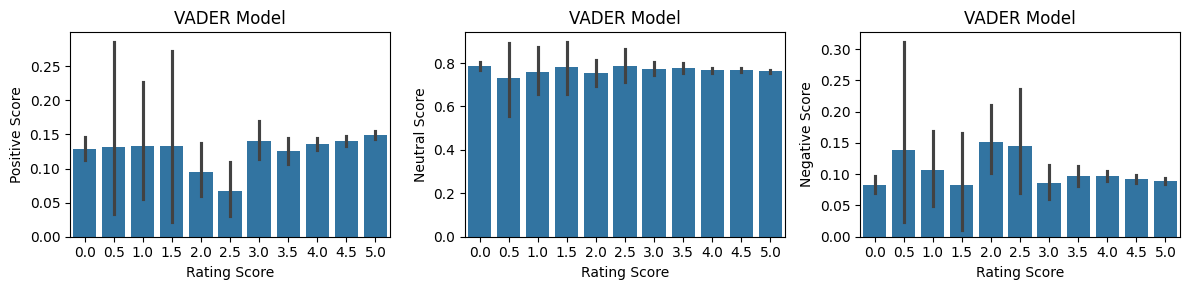

In [62]:
fig, axs = plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=vaders, x='RATING_SCORES',y='pos',ax=axs[0])
sns.barplot(data=vaders, x='RATING_SCORES',y='neu',ax=axs[1])
sns.barplot(data=vaders, x='RATING_SCORES',y='neg',ax=axs[2])
axs[0].set_title('VADER Model')
axs[0].set_xlabel('Rating Score')
axs[0].set_ylabel('Positive Score')

axs[1].set_title('VADER Model')
axs[1].set_xlabel('Rating Score')
axs[1].set_ylabel('Neutral Score')

axs[2].set_title('VADER Model')
axs[2].set_xlabel('Rating Score')
axs[2].set_ylabel('Negative Score')
plt.tight_layout()
plt.show()

In [34]:
def mapear_intervalo(valor):
    # Mapeia o valor do intervalo -1 a +1 para o intervalo 0 a +5
    novo_valor = ((valor + 1) / 2) * 5
    return novo_valor

vaders['compound_transformed'] = vaders.apply(lambda x: mapear_intervalo(x['compound']),axis=1)
vaders.head()

,index,NAME,YEAR,DIRECTOR,RATINGS,RATING_SCORES,REVIEWS,neg,neu,pos,compound,compound_transformed
0,0,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,honor in the individual is virtue honor in a ...,0.144,0.398,0.458,0.7430,4.35750
1,1,Harakiri,1962,Masaki Kobayashi,★★★★½,4.5,"Firstly, I must apologise for holding off on ...",0.000,0.717,0.283,0.9781,4.94525
2,2,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,God damn what an impeccable film. Not dated i...,0.048,0.855,0.097,0.7498,4.37450
3,3,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,Probably the greatest film ever.. a film abou...,0.131,0.591,0.278,0.7906,4.47650
4,4,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,Immediately pulls you in with its captivating...,0.083,0.807,0.109,0.7055,4.26375


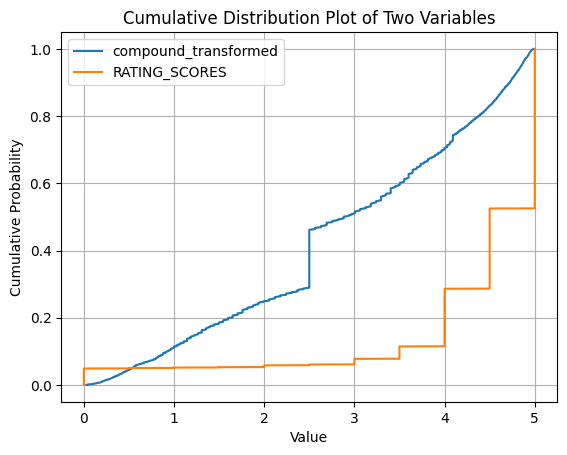

In [35]:
# Calculate cumulative distribution function (CDF) for each variable
cdf_variable1 = np.sort(vaders['compound_transformed'])
cdf_variable2 = np.sort(vaders['RATING_SCORES'])
y_variable1 = np.arange(1, len(cdf_variable1) + 1) / len(cdf_variable1)
y_variable2 = np.arange(1, len(cdf_variable2) + 1) / len(cdf_variable2)
# Plot the CDFs
plt.plot(cdf_variable1, y_variable1, label='compound_transformed')
plt.plot(cdf_variable2, y_variable2, label='RATING_SCORES')
# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Plot of Two Variables')
plt.legend()
# Show the plot
plt.grid(True)
plt.show()

#####
# 0, 1, 1, 2, 3, 4, 5, 5

# total = 8 amostras
# ate 0 estrelas = 1 pessoa = 1/8 = 12,5%
# at'e 1 estrela = 3 pessoas = 3/8 =37,5%
# ate 2 estrelas = 4 pessoas = 50%
# ate 3 estrelas = 5 pessoas = ....

In [36]:
# avaliar reviews 5 estrelas separadamente

In [64]:
# if compound >= 0.5 => positive
# if compound < -0.5 => negative
# between 0.5 and -0.5 => neutral
def polarity_classificator(compound):
    if compound >= 0.5:
        return 'pos'
    elif -0.5 < compound < 0.5:
        return 'neu'
    return 'neg'

# vaders['compound_classification'] = vaders['compound'].apply(lambda c: polarity_classificator(c))
vaders['compound_classification'] = vaders['compound_transformed'].apply(lambda c: polarity_classificator(c))
vaders[:5]

,index,NAME,YEAR,DIRECTOR,RATINGS,RATING_SCORES,RATING_CLASSIFICATION,REVIEWS,neg,neu,pos,compound,compound_transformed,compound_classification
0,0,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,pos,honor in the individual is virtue honor in a ...,0.144,0.398,0.458,0.7430,4.35750,pos
1,1,Harakiri,1962,Masaki Kobayashi,★★★★½,4.5,pos,"Firstly, I must apologise for holding off on ...",0.000,0.717,0.283,0.9781,4.94525,pos
2,2,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,pos,God damn what an impeccable film. Not dated i...,0.048,0.855,0.097,0.7498,4.37450,pos
3,3,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,pos,Probably the greatest film ever.. a film abou...,0.131,0.591,0.278,0.7906,4.47650,pos
4,4,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,pos,Immediately pulls you in with its captivating...,0.083,0.807,0.109,0.7055,4.26375,pos


In [65]:
# if rating >= 3 => positive
# if rating <= 2 => negative
# between 2 and 3 => neutral
def rating_classificator(rating):
    if rating >= 3:
        return 'pos'
    elif 2 < rating < 3:
        return 'neu'
    return 'neg'

vaders['RATING_CLASSIFICATION'] = vaders['RATING_SCORES'].apply(lambda c: rating_classificator(c))

vaders.insert(6, 'RATING_CLASSIFICATION', vaders.pop('RATING_CLASSIFICATION'))
vaders[:5]

,index,NAME,YEAR,DIRECTOR,RATINGS,RATING_SCORES,RATING_CLASSIFICATION,REVIEWS,neg,neu,pos,compound,compound_transformed,compound_classification
0,0,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,pos,honor in the individual is virtue honor in a ...,0.144,0.398,0.458,0.7430,4.35750,pos
1,1,Harakiri,1962,Masaki Kobayashi,★★★★½,4.5,pos,"Firstly, I must apologise for holding off on ...",0.000,0.717,0.283,0.9781,4.94525,pos
2,2,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,pos,God damn what an impeccable film. Not dated i...,0.048,0.855,0.097,0.7498,4.37450,pos
3,3,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,pos,Probably the greatest film ever.. a film abou...,0.131,0.591,0.278,0.7906,4.47650,pos
4,4,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,pos,Immediately pulls you in with its captivating...,0.083,0.807,0.109,0.7055,4.26375,pos


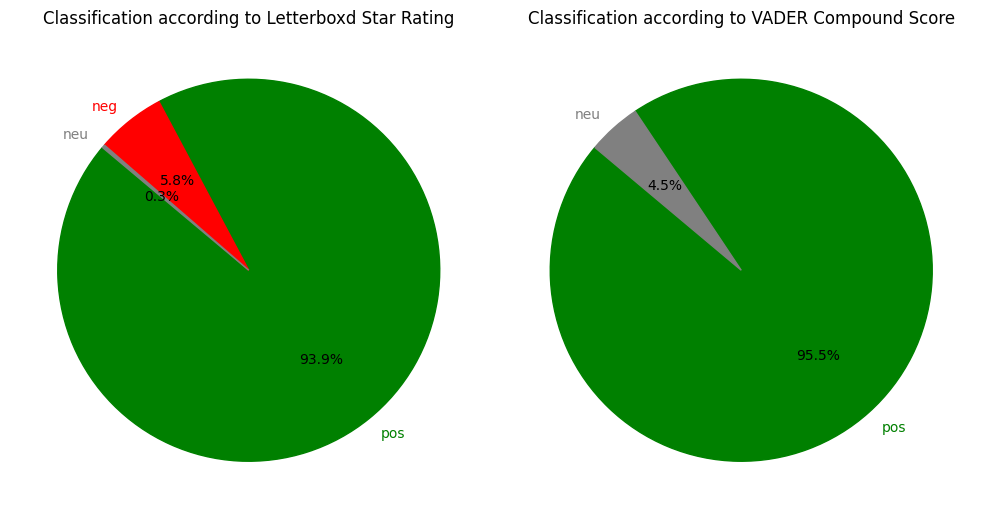

In [66]:
colors = {'pos': 'green', 'neg': 'red', 'neu': 'gray'}

fig, axs = plt.subplots(1,2,figsize=(10, 6))

rating_polarity_count = vaders['RATING_CLASSIFICATION'].value_counts()
vader_polarity_count = vaders['compound_classification'].value_counts()


patches_0, texts_0, pcts_0 = axs[0].pie(rating_polarity_count, labels=rating_polarity_count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Classification according to Letterboxd Star Rating')

patches_1, texts_1, pcts_1 = axs[1].pie(vader_polarity_count, labels=vader_polarity_count.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Classification according to VADER Compound Score')

for i,patch in enumerate(patches_0):
    texts_0[i].set_color(colors[texts_0[i].get_text()])
    patches_0[i].set_color(colors[texts_0[i].get_text()])

for i,patch in enumerate(patches_1):
    texts_1[i].set_color(colors[texts_1[i].get_text()])
    patches_1[i].set_color(colors[texts_1[i].get_text()])

plt.tight_layout()
plt.show()

### **RoBERTa Pretrained Model**

In [40]:
# !pip install transformers

In [41]:
# !pip3 install torch --index-url https://download.pytorch.org/whl/cu118

In [42]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
# softmax é utilizda para transformar uma lista de números em uma distribuição de probabilidade
from scipy.special import softmax

In [43]:
task = 'sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

""" max_length = 3 tokens
input = 'bla bla'
output = 'bla bla <PAD>' -> padding

input = 'bla bla bla bla'
output = 'bla bla bla' -> truncate """

" max_length = 3 tokens\ninput = 'bla bla'\noutput = 'bla bla <PAD>' -> padding\n\ninput = 'bla bla bla bla'\noutput = 'bla bla bla' -> truncate "

In [44]:
""" # Testando o modelo RoBERTa
print(review_example)
# Tokenizando o texto em uma representação numérica
# 'pt' indica PyTorch, devendo retornar tensores PyTorch
encoded_text = tokenizer(review_example, return_tensors='pt') """

" # Testando o modelo RoBERTa\nprint(review_example)\n# Tokenizando o texto em uma representação numérica\n# 'pt' indica PyTorch, devendo retornar tensores PyTorch\nencoded_text = tokenizer(review_example, return_tensors='pt') "

In [45]:
""" # Passando encoded_text como um dicionário
output = model(**encoded_text) """

' # Passando encoded_text como um dicionário\noutput = model(**encoded_text) '

In [46]:
""" # Convertendo tensor PyTorch para array NumPy
scores = output[0][0].detach().numpy() """

' # Convertendo tensor PyTorch para array NumPy\nscores = output[0][0].detach().numpy() '

In [47]:
""" # Convertendo os escores em probabilidades
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2] 
}
scores_dict """

" # Convertendo os escores em probabilidades\nscores = softmax(scores)\nscores_dict = {\n    'roberta_neg': scores[0],\n    'roberta_neu': scores[1],\n    'roberta_pos': scores[2] \n}\nscores_dict "

In [48]:
def roberta_polarity_scores(text):
    # encoded_text = tokenizer(text, return_tensors='pt')
    encoded_text = tokenizer(text, return_tensors='pt',truncation=True, max_length=512)
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]}
    return scores_dict

In [49]:
result = {}
result.update(reviews_df['REVIEWS'].apply(lambda review: roberta_polarity_scores(review)))
result

{0: {'roberta_neg': 0.24510197,
  'roberta_neu': 0.62620723,
  'roberta_pos': 0.12869081},
 1: {'roberta_neg': 0.011628874,
  'roberta_neu': 0.059549186,
  'roberta_pos': 0.9288219},
 2: {'roberta_neg': 0.090518326,
  'roberta_neu': 0.19229084,
  'roberta_pos': 0.7171908},
 3: {'roberta_neg': 0.0034750777,
  'roberta_neu': 0.028253,
  'roberta_pos': 0.9682719},
 4: {'roberta_neg': 0.0032215575,
  'roberta_neu': 0.038512915,
  'roberta_pos': 0.9582656},
 5: {'roberta_neg': 0.57564837,
  'roberta_neu': 0.39552286,
  'roberta_pos': 0.028828694},
 6: {'roberta_neg': 0.18852922,
  'roberta_neu': 0.65830547,
  'roberta_pos': 0.15316528},
 7: {'roberta_neg': 0.04452309,
  'roberta_neu': 0.13341151,
  'roberta_pos': 0.82206535},
 8: {'roberta_neg': 0.74621546,
  'roberta_neu': 0.20612234,
  'roberta_pos': 0.047662176},
 9: {'roberta_neg': 0.09947591,
  'roberta_neu': 0.33752516,
  'roberta_pos': 0.56299895},
 10: {'roberta_neg': 0.31705475,
  'roberta_neu': 0.5892331,
  'roberta_pos': 0.093712

In [50]:
robertas = pd.DataFrame(result)
robertas[:5]

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
roberta_neg,0.245102,0.011629,0.090518,0.003475,0.003222,0.575648,0.188529,0.044523,0.746215,0.099476,...,0.147474,0.035977,0.155565,0.148535,0.001914,0.122498,0.832808,0.010731,0.006680,0.156693
roberta_neu,0.626207,0.059549,0.192291,0.028253,0.038513,0.395523,0.658305,0.133412,0.206122,0.337525,...,0.549903,0.398452,0.344926,0.482598,0.029936,0.398613,0.148498,0.221657,0.050347,0.810012
roberta_pos,0.128691,0.928822,0.717191,0.968272,0.958266,0.028829,0.153165,0.822065,0.047662,0.562999,...,0.302623,0.565570,0.499509,0.368868,0.968150,0.478889,0.018694,0.767612,0.942973,0.033295


In [51]:
robertas = robertas.T
robertas[:5]

,roberta_neg,roberta_neu,roberta_pos
0,0.245102,0.626207,0.128691
1,0.011629,0.059549,0.928822
2,0.090518,0.192291,0.717191
3,0.003475,0.028253,0.968272
4,0.003222,0.038513,0.958266


In [52]:
reviews_df = reviews_df.reset_index()
reviews_df
robertas = robertas.reset_index()
robertas
robertas = reviews_df.merge(robertas, on='index', how='right')

In [53]:
robertas.to_csv('./robertas.csv')
robertas.head(5)

,level_0,index,NAME,YEAR,DIRECTOR,RATINGS,RATING_SCORES,REVIEWS,roberta_neg,roberta_neu,roberta_pos
0,0,0,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,honor in the individual is virtue honor in a ...,0.245102,0.626207,0.128691
1,1,1,Harakiri,1962,Masaki Kobayashi,★★★★½,4.5,"Firstly, I must apologise for holding off on ...",0.011629,0.059549,0.928822
2,2,2,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,God damn what an impeccable film. Not dated i...,0.090518,0.192291,0.717191
3,3,3,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,Probably the greatest film ever.. a film abou...,0.003475,0.028253,0.968272
4,4,4,Harakiri,1962,Masaki Kobayashi,★★★★★,5.0,Immediately pulls you in with its captivating...,0.003222,0.038513,0.958266


In [56]:
robertas['compound'] = robertas['roberta_neg'] + (robertas['roberta_neu'] * 2) + (robertas['roberta_pos'] * 3) - 2
print(robertas['compound'].min())
print(robertas['compound'].max())

-0.98134613
0.990988


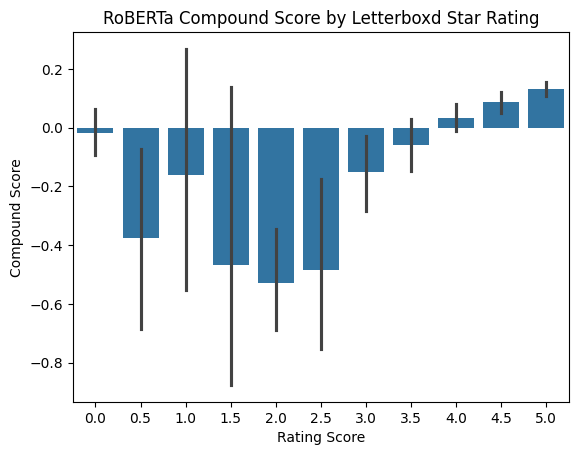

In [59]:
ax = sns.barplot(data=robertas, x='RATING_SCORES', y='compound')
ax.set_title('RoBERTa Compound Score by Letterboxd Star Rating')
plt.xlabel('Rating Score')
plt.ylabel('Compound Score')
plt.show()

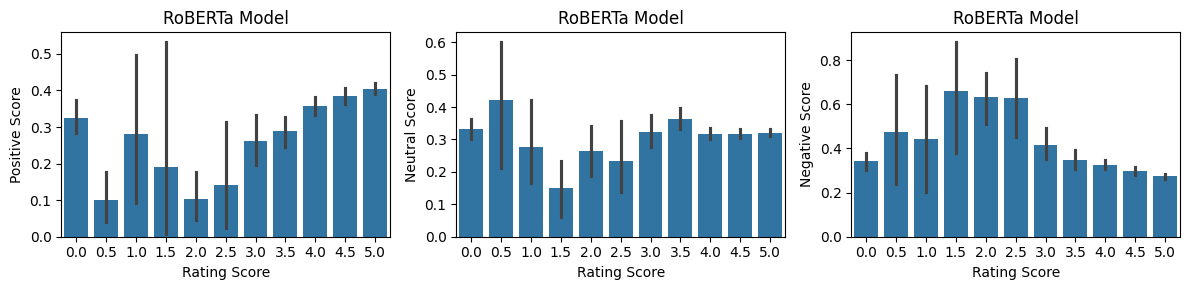

In [63]:
fig, axs = plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=robertas, x='RATING_SCORES',y='roberta_pos',ax=axs[0])
sns.barplot(data=robertas, x='RATING_SCORES',y='roberta_neu',ax=axs[1])
sns.barplot(data=robertas, x='RATING_SCORES',y='roberta_neg',ax=axs[2])
axs[0].set_title('RoBERTa Model')
axs[0].set_xlabel('Rating Score')
axs[0].set_ylabel('Positive Score')

axs[1].set_title('RoBERTa Model')
axs[1].set_xlabel('Rating Score')
axs[1].set_ylabel('Neutral Score')

axs[2].set_title('RoBERTa Model')
axs[2].set_xlabel('Rating Score')
axs[2].set_ylabel('Negative Score')
plt.tight_layout()
plt.show()